# MEAN-SHIFT TRACKING

In [745]:
import numpy as np
import cv2
from ex2_utils import generate_responses_1
import matplotlib.pyplot as plt
import seaborn as sns


## Mean-shift mode seeking

In [721]:
def plot_mean_shift_convergence(landscape, all_x, all_y):
    # Visualize the landscape with the computed mode
    plt.figure(figsize=(6,5))
    x_plot,y_plot = np.arange(landscape.shape[0]), np.arange(landscape.shape[1])
    x_plot,y_plot  = np.meshgrid(x_plot,y_plot)
    # ax.plot_surface(x_plot,y_plot , landscape, alpha = 0.5)
    sns.heatmap(landscape)
    # Visualize the steps
    plt.scatter(all_x,all_y, color = "green")

In [ ]:
# Mean shift algorithm
def mean_shift(pdf, x_start, y_start, kernel_size,termination_criterium = "step_less_than", n_iter = 100 ,return_all_x_y = False, seed = 42):
    """Calculates the mean shift algorithm on the provided distribution"""
    # set the seed for replicability
    np.random.seed(seed)
    # Kernel has to be odd
    if kernel_size % 2 == 0:
        kernel_size += 1
    # Try the Epanechnikov kernel first (basically just multiply)
    x = x_start
    y = y_start
    # Save all points for visualization
    all_x = []
    all_y = []
    # Epsilon to not divide by 0
    eps = 1e-7
    kernel_half = kernel_size // 2
    # Pad the pdf and update the x,y
    pdf_len = pdf.shape[0]
    # print(pdf_len)
    pdf = np.pad(pdf, pad_width=kernel_size)
    x += kernel_size
    y += kernel_size
    for i in np.arange(n_iter):
        # Get the weights matrix
        weights_mtx = pdf[y-kernel_half:y+kernel_half+1,x-kernel_half:x+kernel_half+1]
        # If the sum of weigths is currently zero randomly pick another position
        if np.sum(weights_mtx) < eps:
            print(x,y)
            x = round(np.random.random() *pdf_len) 
            y = round(np.random.random() * pdf_len) 
            print(x,y)
            continue
        # Change them so that it will be a pdf on the current patch (sum of weights to 1)
        weights_mtx = weights_mtx / (np.sum(weights_mtx))
        # Get the matrices of differences
        x_diff_mtx = np.arange(-kernel_half, kernel_half+1)
        x_diff_mtx = np.tile(x_diff_mtx, (kernel_size, 1))
        y_diff_mtx = x_diff_mtx.T
        # Get the positions matrices for x and y
        x_i_mtx = (x * np.ones_like(x_diff_mtx) + x_diff_mtx)
        y_i_mtx = (y * np.ones_like(x_diff_mtx) + y_diff_mtx)
        # Finish the difference matrices
        x_diff_mtx = (x_diff_mtx/kernel_size)**2
        y_diff_mtx = (y_diff_mtx/kernel_size)**2
        # Get the new x and y
        x_new = np.sum(x_i_mtx * weights_mtx * x_diff_mtx) / (np.sum(weights_mtx * x_diff_mtx) + eps)
        y_new = np.sum(y_i_mtx * weights_mtx * y_diff_mtx) / (np.sum(weights_mtx * y_diff_mtx) + eps)
    
        all_x.append(round(x_new) - kernel_size)
        all_y.append(round(y_new) - kernel_size)

        # Check the termination criterium
        if termination_criterium == "step_less_than":
            if (np.abs(x - x_new) < 0.5) and (np.abs(y - y_new) < 0.5):
                print(x, x_new)
                print(i)
                break

        

        x = round(x_new)
        y = round(y_new)

    
    if return_all_x_y:
        return all_x,all_y
    return x - kernel_size,y - kernel_size

28 38
37 95
37 37.15859850101234
1


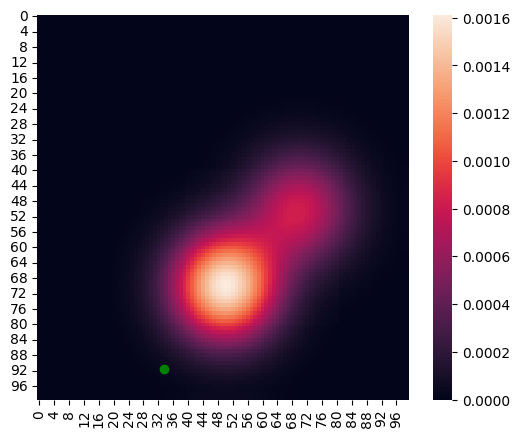

In [ ]:
# Load the function landscape
landscape = generate_responses_1()
# Report: if the kernel to small, it doesnt converge
all_x,all_y = mean_shift(landscape,25,35,3, return_all_x_y=True) 

# Visualize the landscape with the computed mode
plot_mean_shift_convergence(landscape, all_x, all_y)

41 40.67664072900697
12
82 82.43390651610945
28


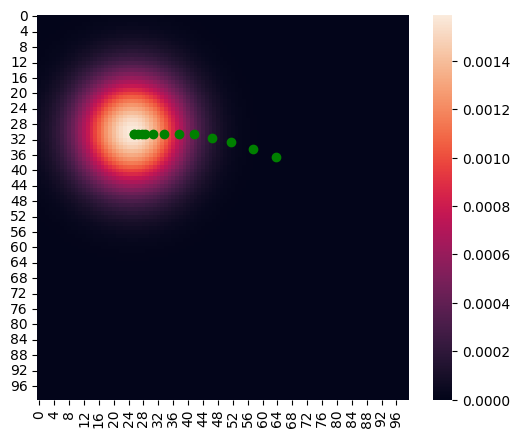

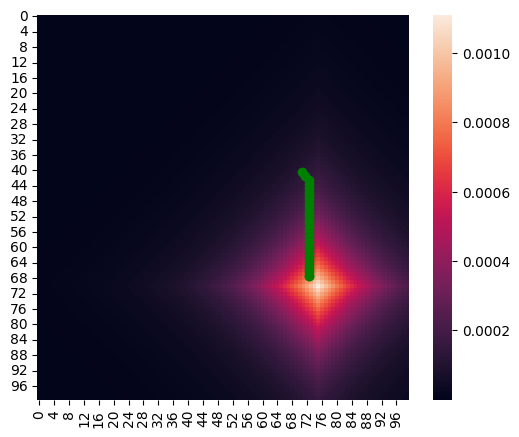

In [805]:
# Defining my own pmf - use the gaussian distro, and laplacian
size = 100
mew_x, mew_y = size//2 - size//4 , size//2  - size//5
sigma_x, sigma_y = 10,10

x = np.arange(size)
y = np.arange(size)
x,y = np.meshgrid(x,y)

gaussian_pmf = 1/(2 * np.pi * sigma_x * sigma_y) * np.exp(-((x - mew_x) ** 2) / (2 * sigma_x**2) - ((y - mew_y) ** 2) / (2 * sigma_y**2))
all_x,all_y = mean_shift(gaussian_pmf,70,40,15, return_all_x_y=True)
plot_mean_shift_convergence(gaussian_pmf, all_x, all_y)

# Laplacian
mew_x, mew_y = size//2 + size//4 , size//2  + size//5
b_x, b_y = 15,15
laplacian_pmf = (1 / (4 * b_x * b_y)) * np.exp(-np.abs(x - mew_x) / b_x - np.abs(y - mew_y) / b_y)
all_x,all_y = mean_shift(laplacian_pmf,70,40,9, return_all_x_y=True)
plot_mean_shift_convergence(laplacian_pmf, all_x, all_y)

## Mean-shift tracker